### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [3]:
print(tf. __version__)

2.19.0


### Defining the path of dataset directory

In [4]:
dataset_path = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\train"

### Visualizing the images and Resize images

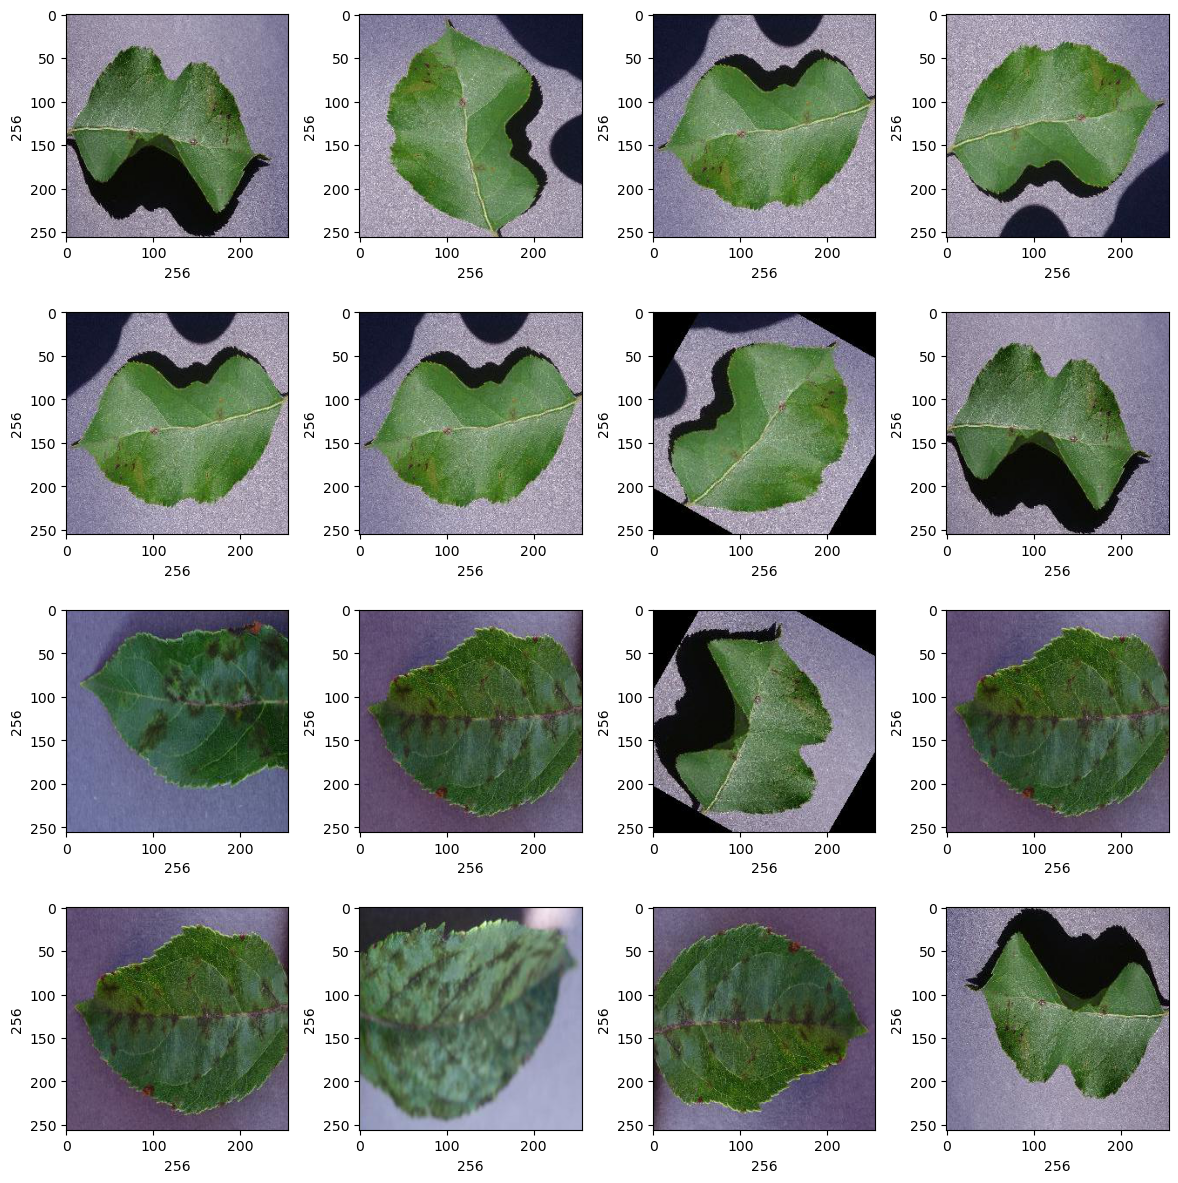

In [5]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\train\Apple___Apple_scab"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

### Convert the images into a Numpy array and normalize them

In [6]:
# Converting Images to array 

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [7]:
dataset_path = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\train"
labels = os.listdir(dataset_path)

print(labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight']


In [8]:

dataset_path = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\train"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = root_dir
binary_labels = list(range(len(all_labels)))

for temp, directory in enumerate(root_dir):
    plant_image_list = listdir(f"{dataset_path}/{directory}")
    for files in plant_image_list:
        image_path = f"{dataset_path}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(temp)


### Visualize the class count and Check for class imbalance

In [9]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0 
2     20
9     19
3     18
10    18
1     17
Name: count, dtype: int64

In [10]:
# it is a balanced dataset as we can see

In [11]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [12]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(182,)

### Splitting the dataset into train, validate and test sets

In [13]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [14]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

### Performing one-hot encoding on target variable

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Creating the model architecture, compile the model and then fit it using the training data

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

D:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         225,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Example model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))  # 11 output classes

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Splitting the training data set into training and validation data sets
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

# Training
epochs = 50
batch_size = 10
history = model.fit(x_train_split, y_train_split, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.0877 - loss: 36.6625 - val_accuracy: 0.1034 - val_loss: 8.4150
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 725ms/step - accuracy: 0.1200 - loss: 7.1161 - val_accuracy: 0.3448 - val_loss: 2.0492
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 879ms/step - accuracy: 0.2448 - loss: 2.0913 - val_accuracy: 0.3103 - val_loss: 2.0182
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 683ms/step - accuracy: 0.4497 - loss: 1.6256 - val_accuracy: 0.3448 - val_loss: 1.8681
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 717ms/step - accuracy: 0.4968 - loss: 1.4202 - val_accuracy: 0.4483 - val_loss: 1.8166
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 703ms/step - accuracy: 0.7322 - loss: 1.0982 - val_accuracy: 0.5517 - val_loss: 1.7756
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 689ms/step - accuracy: 0.8195 - loss: 0.9002 - val_accuracy: 0.4138 - val_loss: 1.8529
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 722ms/step - accuracy: 0.7919 - loss: 0.7251 - val_accuracy: 0

In [22]:
model.save(r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\plant_disease_model.h5")


### Plot the accuracy and loss against each epoch

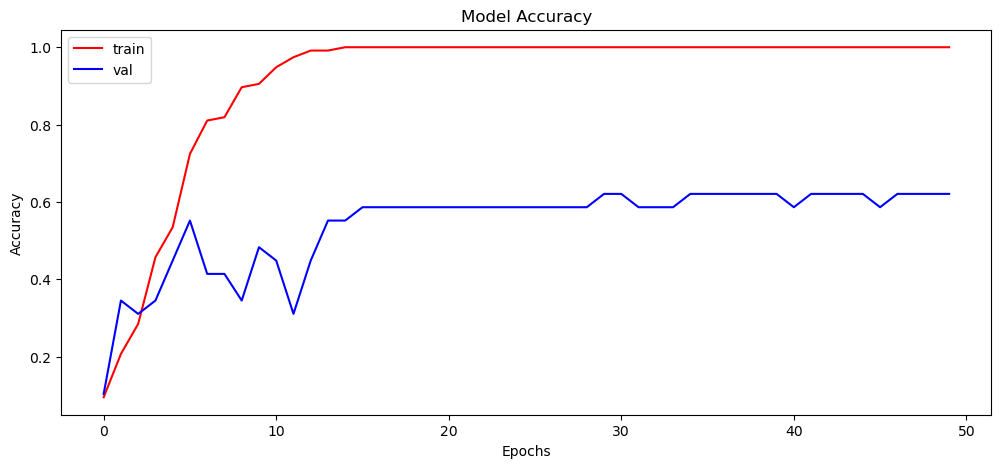

In [23]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [24]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.5659 - loss: 2.0151
Test Accuracy: 56.75675868988037


### Make predictions on testing data

In [25]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step


### Visualizing the original and predicted labels for the test images

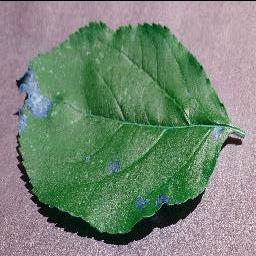

In [26]:
# Plotting image to compare

img = array_to_img(x_test[11])
img

In [27]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Apple___Black_rot
Predicted :  Cherry_(including_sour)___healthy
[3.4112916e-05 4.6794850e-07 2.2360415e-03 8.2302618e-01 1.4806828e-02
 1.5491975e-02 1.3582647e-01 6.9742345e-07 3.6415672e-06 1.5211810e-07
 8.5733943e-03]


In [28]:
import numpy as np

# Print true and predicted labels for all samples
for i in range(min(len(y_test), len(y_pred))):
    true_idx = np.argmax(y_test[i])
    pred_idx = np.argmax(y_pred[i])
    
    if true_idx < len(all_labels) and pred_idx < len(all_labels):
        print(f"Sample {i+1}: True = {all_labels[true_idx]} | Predicted = {all_labels[pred_idx]}")
    else:
        print(f"Sample {i+1}: Label index out of range! True index = {true_idx}, Predicted index = {pred_idx}")

Sample 1: True = Corn_(maize)___healthy | Predicted = Corn_(maize)___healthy
Sample 2: True = Corn_(maize)___Common_rust_ | Predicted = Corn_(maize)___Common_rust_
Sample 3: True = Apple___healthy | Predicted = Apple___healthy
Sample 4: True = Corn_(maize)___Northern_Leaf_Blight | Predicted = Corn_(maize)___Common_rust_
Sample 5: True = Blueberry___healthy | Predicted = Cherry_(including_sour)___healthy
Sample 6: True = Corn_(maize)___Northern_Leaf_Blight | Predicted = Corn_(maize)___Northern_Leaf_Blight
Sample 7: True = Cherry_(including_sour)___Powdery_mildew | Predicted = Corn_(maize)___Northern_Leaf_Blight
Sample 8: True = Apple___Apple_scab | Predicted = Cherry_(including_sour)___healthy
Sample 9: True = Corn_(maize)___healthy | Predicted = Corn_(maize)___healthy
Sample 10: True = Cherry_(including_sour)___Powdery_mildew | Predicted = Cherry_(including_sour)___Powdery_mildew
Sample 11: True = Apple___Cedar_apple_rust | Predicted = Apple___Cedar_apple_rust
Sample 12: True = Apple__

In [29]:
# Finding max value from predition list and comaparing original value vs predicted
test_dir = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\test\test\AppleCedarRust1"
print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Apple___Black_rot
Predicted :  Cherry_(including_sour)___healthy
[3.4112916e-05 4.6794850e-07 2.2360415e-03 8.2302618e-01 1.4806828e-02
 1.5491975e-02 1.3582647e-01 6.9742345e-07 3.6415672e-06 1.5211810e-07
 8.5733943e-03]


In [30]:
test_dir = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\test\test"

# Load and preprocess test images
test_image_list = []
for file in listdir(test_dir):
    image_path = os.path.join(test_dir, file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    test_image_list.append(img_to_array(image))

x_test = np.array(test_image_list)
x_test = x_test.astype('float32') / 255.0

# Make predictions
y_pred = model.predict(x_test)

# Get the predicted labels
predicted_labels = np.argmax(y_pred, axis=1)

# Print the predicted labels
for i, file in enumerate(listdir(test_dir)):
    print(f"Image: {file}")
    print(f"Predicted Disease: {all_labels[predicted_labels[i]]}")
    print("Prediction Probabilities:")
    print(y_pred[i])
    print("------------------------")

# Plot an image to compare
img = array_to_img(x_test[0])
img

# Print original and predicted labels for a specific image
# Make sure you have y_test (original labels) for the test images
print("Originally : ", all_labels[np.argmax(y_test[0])])
print("Predicted : ", all_labels[predicted_labels[0]])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Image: AppleCedarRust1.JPG
Predicted Disease: Apple___Cedar_apple_rust
Prediction Probabilities:
[4.4276039e-06 8.2682439e-09 9.2775512e-01 2.4931176e-04 5.4219728e-03
 9.5001059e-07 6.6272207e-02 1.3824444e-10 1.4428181e-11 7.1683033e-12
 2.9594198e-04]
------------------------
Image: AppleCedarRust2.JPG
Predicted Disease: Cherry_(including_sour)___Powdery_mildew
Prediction Probabilities:
[2.0915259e-01 2.0731437e-04 4.7163051e-02 3.7510317e-02 4.5184568e-03
 4.2794295e-02 4.4574562e-01 2.5300958e-04 1.1297526e-03 5.3093107e-03
 2.0621637e-01]
------------------------
Image: AppleCedarRust3.JPG
Predicted Disease: Apple___Cedar_apple_rust
Prediction Probabilities:
[1.0135605e-04 8.8684282e-10 9.9518210e-01 1.3577065e-03 8.0907113e-05
 2.1985952e-06 2.8454314e-03 3.7774140e-07 9.3475535e-08 1.5775392e-07
 4.2964131e-04]
------------------------
Image: AppleCedarRust4.JPG
Predicted Disease: Cherry_(including_sour)___Powdery_mildew
Prediction Probabi

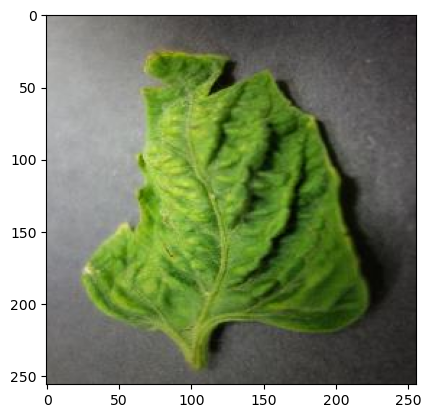

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Disease:  Corn_(maize)___Northern_Leaf_Blight
Prediction Probabilities:
[9.91636701e-03 1.46930915e-07 1.11145303e-01 1.32041634e-04
 8.53445008e-03 1.40296121e-03 1.24792136e-01 2.87391208e-06
 1.06515263e-05 7.97228836e-07 7.44062185e-01]


In [31]:
import cv2
import matplotlib.pyplot as plt

img_path = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\test\test\TomatoYellowCurlVirus4.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()# Load the image
img_path = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\test\test\TomatoYellowCurlVirus4.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (256, 256))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32') / 255.0

# Make prediction
y_pred = model.predict(img)

# Get the predicted label
predicted_label = all_labels[np.argmax(y_pred[0])]

# Print the predicted label
print("Predicted Disease: ", predicted_label)
print("Prediction Probabilities:")
print(y_pred[0])

In [ ]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

def select_image():
    file_path = filedialog.askopenfilename(title="Select Image", filetypes=[("Image Files", ".jpg .jpeg .png .bmp")])
    if file_path:
        entry.delete(0, tk.END)
        entry.insert(0, file_path)

def predict_disease():
    file_path = entry.get()
    if file_path:
        img = cv2.imread(file_path)
        img = cv2.resize(img, (256, 256))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32') / 255.0
        y_pred = model.predict(img)
        predicted_label = all_labels[np.argmax(y_pred[0])]
        prediction_probabilities = y_pred[0]
        result_label.config(text=f"Predicted Disease: {predicted_label}")
        result_probabilities.config(text=f"Prediction Probabilities: {prediction_probabilities}")

root = tk.Tk()
root.title("Plant Disease Predictor")

entry = tk.Entry(root, width=50)
entry.pack(padx=10, pady=10)

select_button = tk.Button(root, text="Select Image", command=select_image)
select_button.pack(pady=10)

predict_button = tk.Button(root, text="Predict Disease", command=predict_disease)
predict_button.pack(pady=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

result_probabilities = tk.Label(root, text="", wraplength=400)
result_probabilities.pack(pady=10)

root.mainloop()

In [33]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the saved model
model = load_model(r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\plant_disease_model.h5")

# Define the all_labels list
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot', 'Apple-Apple_scab', 'Apple-Black_rot', 'Apple-Cedar_apple_rust', 'Cherry-Powdery_mildew', 'Grape-Black_rot', 'Grape-Esca', 'Peach-Bacterial_spot', 'Strawberry-Leaf_scorch']

def select_image():
    file_path = filedialog.askopenfilename(title="Select Image", filetypes=[("Image Files", ".jpg .jpeg .png .bmp")])
    if file_path:
        entry.delete(0, tk.END)
        entry.insert(0, file_path)

def predict_disease():
    file_path = entry.get()
    if file_path:
        img = cv2.imread(file_path)
        img = cv2.resize(img, (256, 256))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32') / 255.0
        y_pred = model.predict(img)
        predicted_label = all_labels[np.argmax(y_pred[0])]
        prediction_probabilities = y_pred[0]
        result_label.config(text=f"Predicted Disease: {predicted_label}")
        result_probabilities.config(text=f"Prediction Probabilities: {prediction_probabilities}")

root = tk.Tk()
root.title("Plant Disease Predictor")

entry = tk.Entry(root, width=50)
entry.pack(padx=10, pady=10)

select_button = tk.Button(root, text="Select Image", command=select_image)
select_button.pack(pady=10)

predict_button = tk.Button(root, text="Predict Disease", command=predict_disease)
predict_button.pack(pady=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

result_probabilities = tk.Label(root, text="", wraplength=400)
result_probabilities.pack(pady=10)

root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [34]:

import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import os

# Load the saved model
model = load_model(r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\plant_disease_model.h5")

# Define the all_labels list automatically
dataset_path = r"D:\INDIAN INSTITUTE OF TECHNOLOGY , GUWAHATI\Plant Disease Detection\train"
all_labels = os.listdir(dataset_path)

def select_image():
    file_path = filedialog.askopenfilename(title="Select Image", filetypes=[("Image Files", ".jpg .jpeg .png .bmp")])
    if file_path:
        entry.delete(0, tk.END)
        entry.insert(0, file_path)

def predict_disease():
    file_path = entry.get()
    if file_path:
        img = cv2.imread(file_path)
        img = cv2.resize(img, (256, 256))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32') / 255.0
        y_pred = model.predict(img)
        predicted_label = all_labels[np.argmax(y_pred[0])]
        prediction_probabilities = y_pred[0]
        result_label.config(text=f"Predicted Disease: {predicted_label}")
        result_probabilities.config(text=f"Prediction Probabilities: {prediction_probabilities}")

root = tk.Tk()
root.title("Plant Disease Predictor")

entry = tk.Entry(root, width=50)
entry.pack(padx=10, pady=10)

select_button = tk.Button(root, text="Select Image", command=select_image)
select_button.pack(pady=10)

predict_button = tk.Button(root, text="Predict Disease", command=predict_disease)
predict_button.pack(pady=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

result_probabilities = tk.Label(root, text="", wraplength=400)
result_probabilities.pack(pady=10)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
